<a href="https://colab.research.google.com/github/Mv0sKff/MyDeepLearning/blob/main/week_2/Aufgabe_2_Multi_Class_Perceptrons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aufgabe 2: Multi-Class Perceptrons

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs #for data generation
from sklearn.preprocessing import OneHotEncoder

In [51]:
#create data
X, y = make_blobs(n_samples=100, centers=2, n_features=2,center_box=(-1,10),random_state=42)

In [52]:
X, y = make_blobs(n_samples=50, centers=3, cluster_std=0.2,n_features=2,center_box=(1,5),random_state=104)

In [53]:
y=(y*2-1) #scale true lables from [0,1] to [-1,1
print(y)

[-1  1  3  1  3  3  1 -1  3  3 -1  3 -1  1  1 -1 -1  1  1 -1  3  1  3  1
  1  1 -1  1  3  1  3 -1 -1  1  3  3  3 -1  3 -1 -1  3 -1  3  1 -1 -1  1
 -1  1]


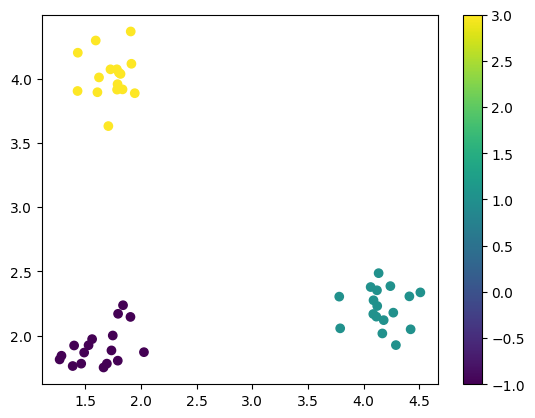

In [54]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.colorbar()

### draw Percepton layout
* Hint: now we have more then one Perceptron
* write math. formulation as linear model

My Perceptron 2.svg

### Transform lables to one-hot coding
* Hint: Use Scikit-Learn

In [55]:
enc = OneHotEncoder(sparse_output=False)
encoded = enc.fit_transform(y.reshape(-1,1))
#y.reshape(-1,1)
#print(encoded)

### Manually find parameters $w$ and $b$ for
* for each Perceptron seperately
* then combine to single matrix multiplication formulation

#### test single perceptrons by class


In [56]:
def plot_line_from_normal_vector_and_offset(normal_vector, offset, x_range=None, ax=None, **kwargs):
    """
    Plots a 2D line defined by its normal vector w and offset b such that wx + b = 0.

    Args:
        normal_vector (list or numpy.ndarray): A 2D vector representing the normal to the line (w). Must be of length 2.
        offset (float): The offset (b) such that w.x + b = 0.
        x_range (tuple, optional): A tuple (xmin, xmax) specifying the range of x-values to plot.
                                     If None (default), a reasonable range is automatically determined.
        ax (matplotlib.axes._axes.Axes, optional): The matplotlib axes object to plot on. If None (default),
                                                  the current axes (plt.gca()) is used, or a new figure and axes
                                                  are created.
        **kwargs: Keyword arguments to pass to the `plot` function (e.g., color, linestyle, linewidth).

    Returns:
        matplotlib.lines.Line2D: The line object created by `ax.plot`.
    """
    normal_vector = np.array(normal_vector)  # Ensure it's a NumPy array for calculations

    if normal_vector.shape != (2,):
        raise ValueError("Normal vector must be a 2D vector (length 2).")

    w1, w2 = normal_vector

    if ax is None:
        fig, ax = plt.subplots()

    if x_range is None:
        # Determine a reasonable x-range
        xmin = -5
        xmax = 5
        x_range = (xmin, xmax)

    xmin, xmax = x_range
    x = np.linspace(xmin, xmax, 100)  # Generate x-values

    if w2 != 0:
        y = (-w1 * x - offset) / w2  # Solve for y: w1*x + w2*y + b = 0  =>  y = (-w1*x - b) / w2
    else:
        # Handle the case where the line is vertical (w2=0). Plot a vertical line.
        if w1 == 0:
            raise ValueError("Cannot plot line with w1=0 and w2=0.")
        x = np.full_like(x, -offset / w1)  # x is constant for a vertical line
        y = np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 100)  # generate y values spanning the current y-axis.

    line, = ax.plot(x, y, **kwargs)

    return line

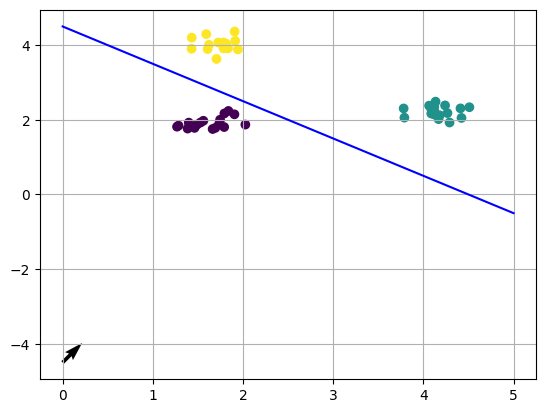

In [57]:
w1 = np.array([1,1])
b1 = -4.5
#w1 = np.array([1,-2])
#b1 = 3

line1 = plot_line_from_normal_vector_and_offset(w1, b1, color='blue', x_range=[0,5])
plt.scatter(X[:,0],X[:,1],c=y)
plt.quiver(0,b1,w1[0],w1[1])
plt.grid()

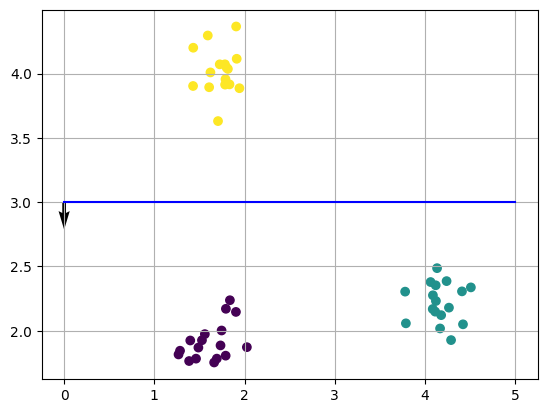

In [58]:
w2 = np.array([0,-1])
b2 = 3

line2 = plot_line_from_normal_vector_and_offset(w2, b2, color='blue', x_range=[0,5])
plt.scatter(X[:,0],X[:,1],c=y)
plt.quiver(0,b2,w2[0],w2[1])
plt.grid()

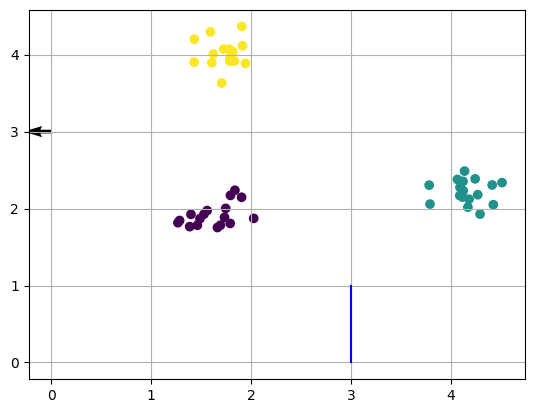

In [59]:
w3 = np.array([-1,0])
b3 = 3

line3 = plot_line_from_normal_vector_and_offset(w3, b3, color='blue', x_range=[0,5])
plt.scatter(X[:,0],X[:,1],c=y)
plt.quiver(0,b3,w3[0],w3[1])
plt.grid()

#### test full Setup

## Add non-linear activation / loss -> $softmax$
* implement a $softmax$ function
* replace $sgn$ by $softmax$
* plot confidence of the test samples

In [60]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

In [61]:
w1.dot(X.T)+b1

array([-0.96576369,  1.9424617 ,  0.83650289,  1.34741841,  1.29688675,
        1.1307948 ,  2.2178298 , -0.42441638,  1.0014333 ,  1.19845326,
       -1.25444209,  1.24928926, -0.44849391,  1.94669854,  1.86526097,
       -0.879803  , -1.41563978,  1.85404924,  2.12194632, -1.02369822,
        1.35437705,  2.12677654,  1.38833197,  1.58548726,  1.80202743,
        1.71790555, -0.75204181,  1.76318555,  1.52810484,  1.75629729,
        0.83262812, -0.9025928 , -1.34934352,  2.3474498 ,  1.13215514,
        1.34697552,  1.3513611 , -0.60131294,  1.32945337, -0.53552877,
       -1.14190358,  1.24511537, -1.37015618,  1.77301588,  1.97299191,
       -1.04511428, -1.08325473,  1.68657725, -1.17702158,  1.9738146 ])

[ True  True False  True False False  True  True False False  True False
  True  True  True  True  True  True  True  True False  True False  True
  True  True  True  True False  True False  True  True  True False False
 False  True False  True  True False  True False  True  True  True  True
  True  True]
(array([ 2,  4,  5,  8,  9, 11, 20, 22, 28, 30, 34, 35, 36, 38, 41, 43]),)


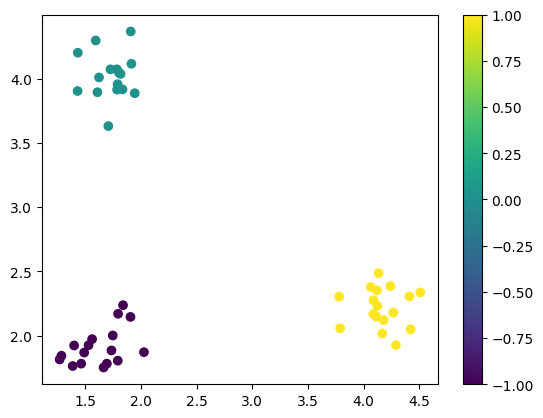

In [62]:
#softmax(w1.dot(X.T)+b1)
print(y==np.sign(w1.dot(X.T)+b1))
pos=np.where(y!=np.sign(w1.dot(X.T)+b1))
print(pos)

y_test=np.copy(y)
y_test[pos]=0
plt.scatter(X[:,0],X[:,1],c=y_test)#set color
plt.colorbar()

[False  True False  True False False  True False False False False False
 False  True  True False False  True  True False False  True False  True
  True  True False  True False  True False False False  True False False
 False False False False False False False False  True False False  True
 False  True]
(array([ 0,  2,  4,  5,  7,  8,  9, 10, 11, 12, 15, 16, 19, 20, 22, 26, 28,
       30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 48]),)


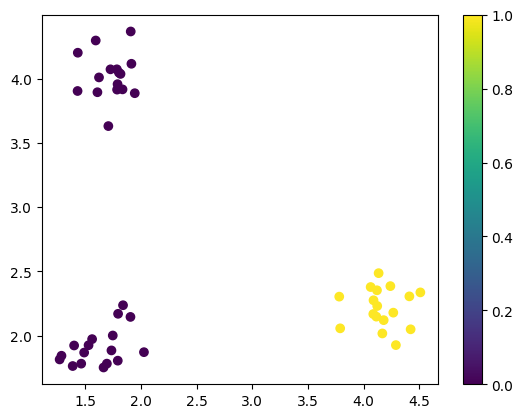

In [63]:
print(y==np.sign(w2.dot(X.T)+b2))

pos=np.where(y!=np.sign(w2.dot(X.T)+b2))
print(pos)

y_test=np.copy(y)
y_test[pos]=0
plt.scatter(X[:,0],X[:,1],c=y_test)#set color
plt.colorbar()

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False]
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),)


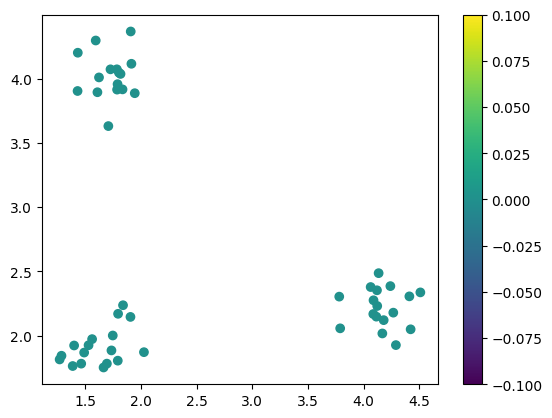

In [64]:
print(y==np.sign(w3.dot(X.T)+b3))

pos=np.where(y!=np.sign(w3.dot(X.T)+b3))
print(pos)

y_test=np.copy(y)
y_test[pos]=0
plt.scatter(X[:,0],X[:,1],c=y_test)#set color
plt.colorbar()